In [1]:
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report

___Chapter 3: Problem 9___

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

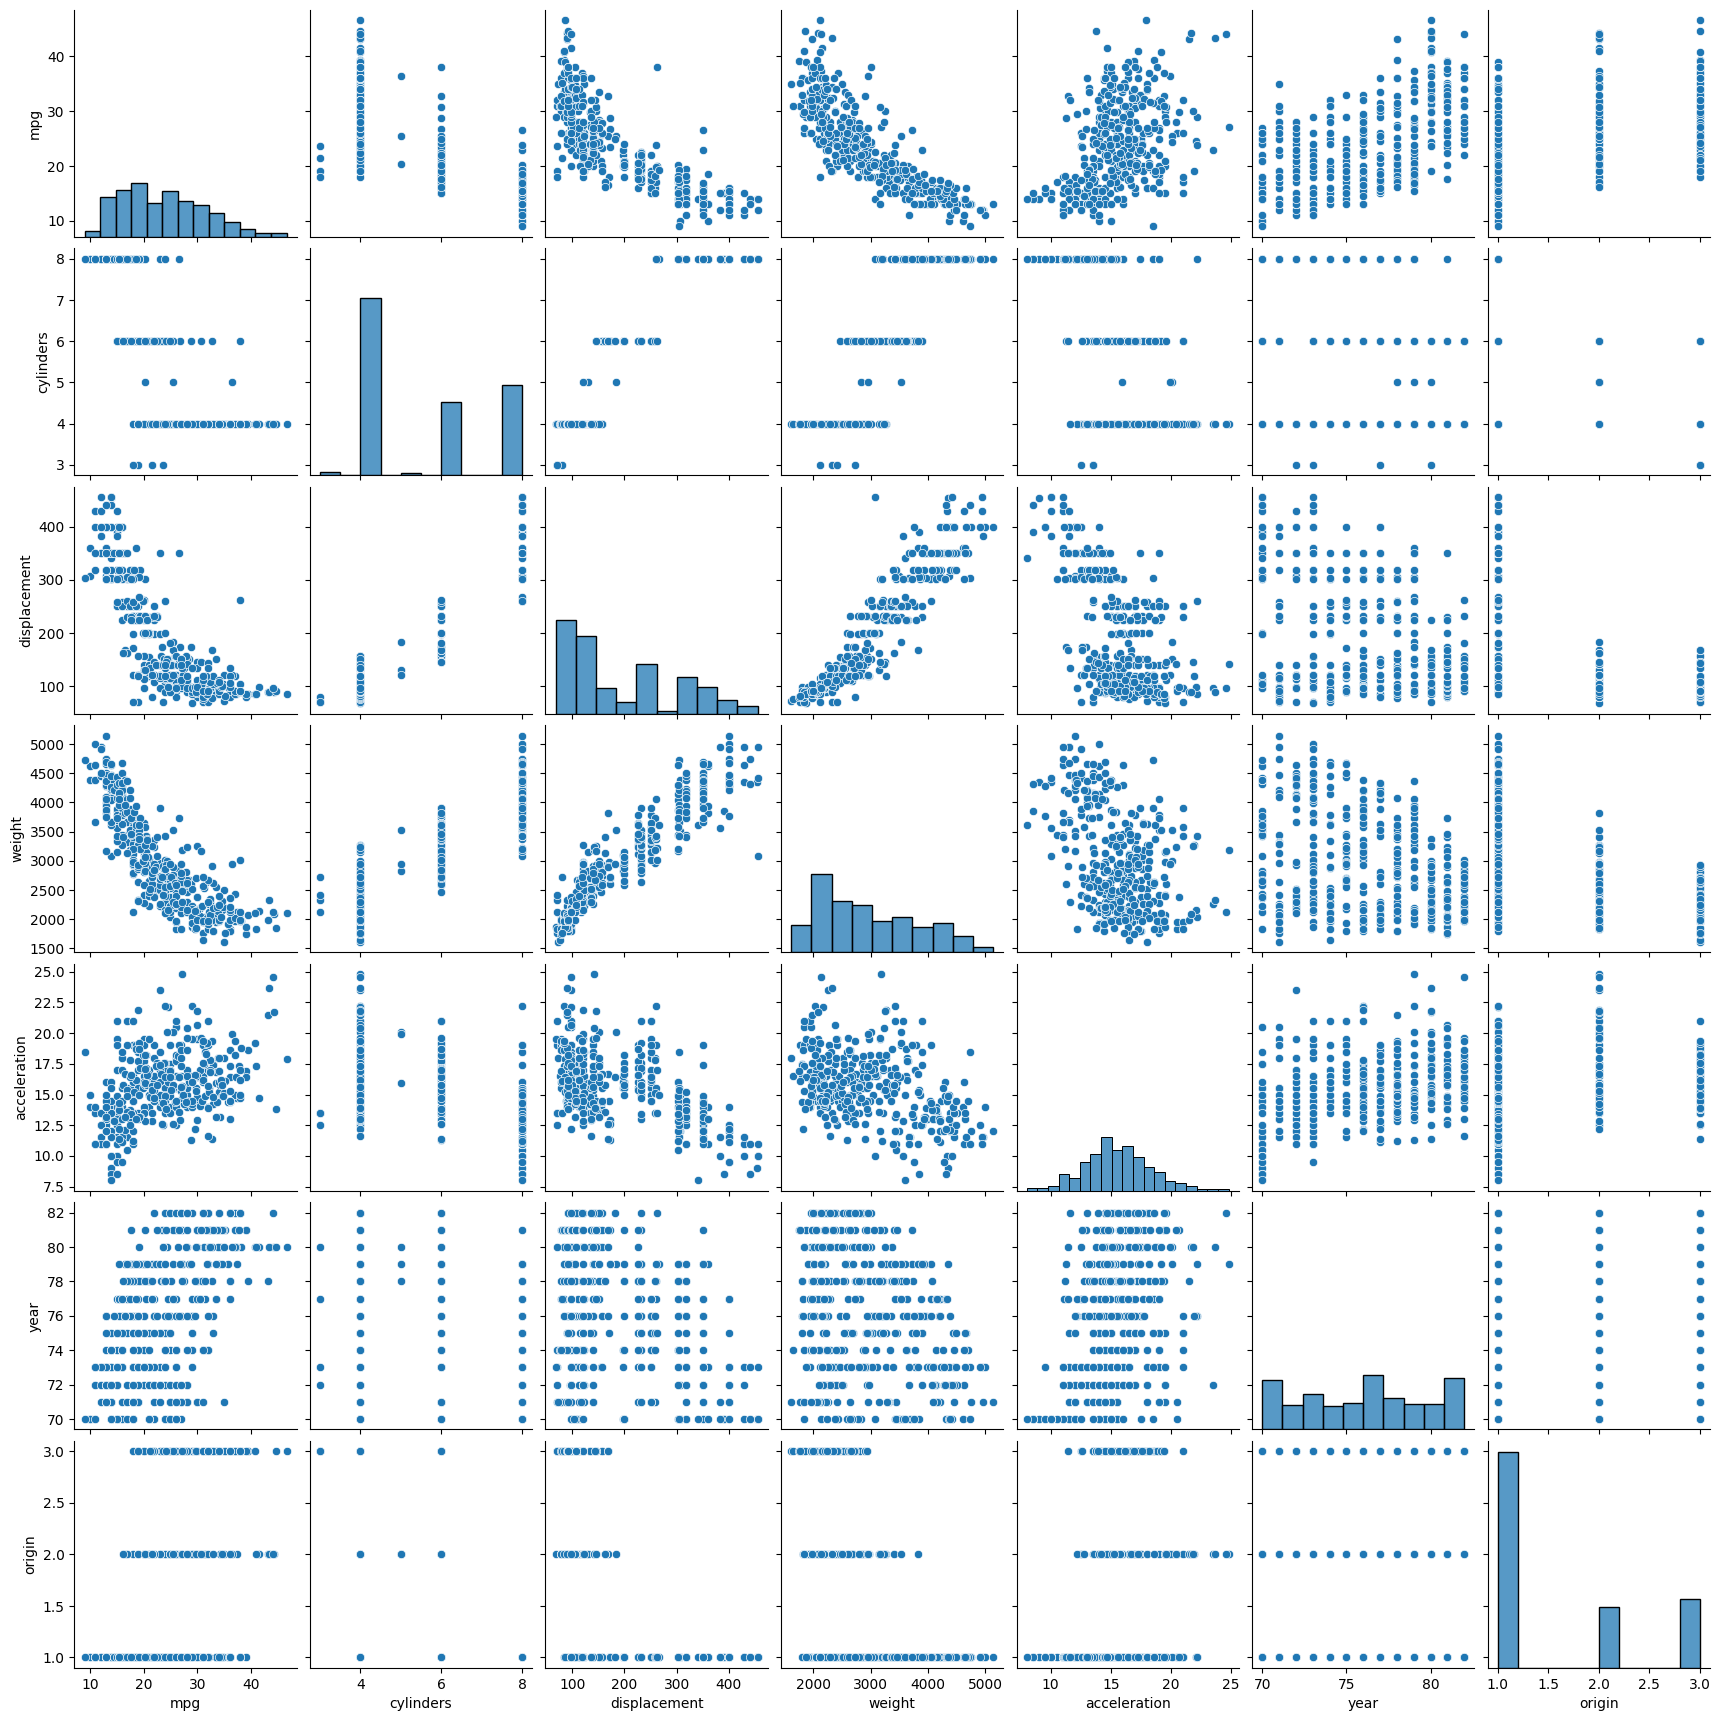

In [2]:
auto_df = pd.read_csv("Auto.csv") 
sns.pairplot(auto_df)

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [3]:
auto_var_df = auto_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
auto_var_df = auto_var_df[auto_var_df['horsepower'] != '?']
auto_var_df['horsepower'] = auto_var_df['horsepower'].astype(float)
auto_var_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


In [4]:
corr1 = auto_var_df.corr()
corr1

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c)  Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:

In [5]:
response = 'mpg'
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

X = auto_var_df[predictors]
y = auto_var_df[response]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        16:05:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

In [6]:
print("F-statistic:", results.fvalue)
print("P-value:", results.f_pvalue)

print()

analysis = "The F-statistic and p-value from the OLS summary provide the same test as ANOVA. Yes, there is a significant relationship between the predictors and response."
print(textwrap.fill(analysis, 200))


F-statistic: 252.42804529131908
P-value: 2.037105930754976e-139

The F-statistic and p-value from the OLS summary provide the same test as ANOVA. Yes, there is a significant relationship between the predictors and response.


ii. Which predictors appear to have a statistically significant relationship to the response?

In [7]:
p_values = results.pvalues[1:]  # Exclude the constant
significant_predictors = p_values[p_values < 0.05]

for predictor, p_val in significant_predictors.items():
    print(f"{predictor:15s}: p-value = {p_val:.6f}")

print()

analysis = "Statistically Strong relationships: displacement, weight, year, origin."
print(textwrap.fill(analysis, 75))

displacement   : p-value = 0.008445
weight         : p-value = 0.000000
year           : p-value = 0.000000
origin         : p-value = 0.000000

Statistically Strong relationships: displacement, weight, year, origin.


iii. What does the coefficient for the year variable suggest?

In [8]:
year_coef = results.params['year']
year_pval = results.pvalues['year']
year_std_err = results.bse['year']
year_conf_int = results.conf_int().loc['year']

print(f"\nCoefficient: {year_coef:.4f}")
print(f"Standard Error: {year_std_err:.4f}")
print(f"P-value: {year_pval:.6f}")
print(f"95% Confidence Interval: [{year_conf_int[0]:.4f}, {year_conf_int[1]:.4f}]")

print()

analysis = "The year variable is STATISTICALLY SIGNIFICANT to the response. The coefficient is POSITIVE"
print(textwrap.fill(analysis, 100))
analysis = f"For one-year increase in model, the fuel efficiency increases by approximately {year_coef:.4f} mpg, holding all other variables constant."
print(textwrap.fill(analysis, 200))


Coefficient: 0.7508
Standard Error: 0.0510
P-value: 0.000000
95% Confidence Interval: [0.6506, 0.8510]

The year variable is STATISTICALLY SIGNIFICANT to the response. The coefficient is POSITIVE
For one-year increase in model, the fuel efficiency increases by approximately 0.7508 mpg, holding all other variables constant.


(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

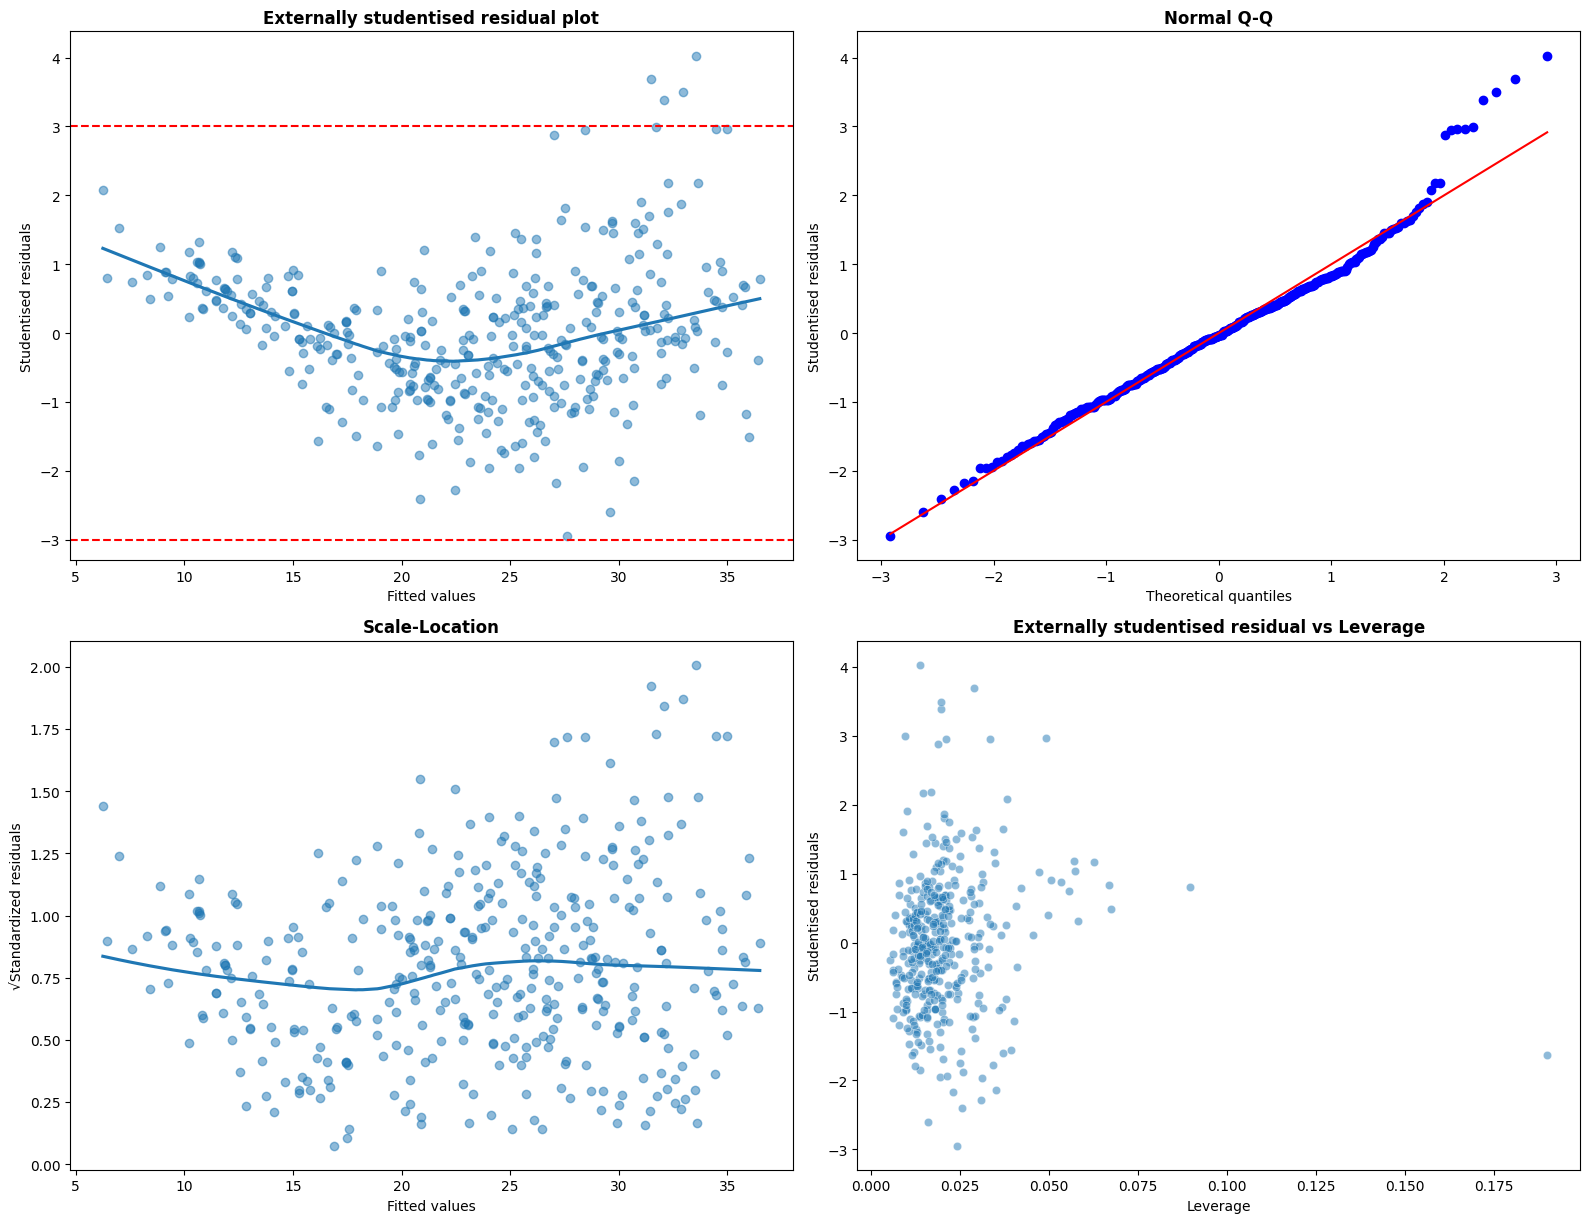


Normality: The top-right plot shows a normal distribution except for high value residuals. This suggests that the model under-estimates mpg for a larger number of observations than we might expect
assuming a normal distribution.
Outliers: The top-left plot suggests that there are four potential outliers towards the high end of our predicted responses. The bottom-right plot suggests that these outliers have low leverage, and
so probably don't have a overly dispraportionate effect on our model.
Leverage: The bottom right plot reveals one point with particularly high leverage, although with a value around -1.5 this point isn't an outlier in terms of studentised residuals.


In [9]:
def lm_stats(X, y, y_pred):
    residuals = y - y_pred
    influence = OLSInfluence(results)
    studentised_residual = influence.resid_studentized_external
    leverage = influence.hat_matrix_diag
    lm_stats_df = pd.DataFrame({
        'y_pred': y_pred,
        'residuals': residuals,
        'studentised_residual': studentised_residual,
        'leverage': leverage
    })
    return lm_stats_df


def lm_plot(lm_stats_df):
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']
    plt.figure(1, figsize=(16, 18))
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True, scatter_kws={'alpha':0.5})
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed')

    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')

    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True, scatter_kws={'alpha':0.5})
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')
    
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t, alpha=0.5)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

y_pred = results.predict(X)
lm_stats_df = lm_stats(X, y, y_pred)
lm_plot(lm_stats_df)

print()

analysis = "Normality: The top-right plot shows a normal distribution except for high value residuals. This suggests that the model under-estimates mpg for a larger number of observations than we might expect assuming a normal distribution."
print(textwrap.fill(analysis, 200))
analysis = "Outliers: The top-left plot suggests that there are four potential outliers towards the high end of our predicted responses. The bottom-right plot suggests that these outliers have low leverage, and so probably don't have a overly dispraportionate effect on our model."
print(textwrap.fill(analysis, 200))
analysis = "Leverage: The bottom right plot reveals one point with particularly high leverage, although with a value around -1.5 this point isn't an outlier in terms of studentised residuals."
print(textwrap.fill(analysis, 200))

(e)  Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [10]:
f = '''mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin) 
    + cylinders:displacement + cylinders:horsepower + cylinders:weight 
    + cylinders:acceleration + cylinders:year + displacement:horsepower 
    + displacement:weight + displacement:acceleration + displacement:year 
    + horsepower:weight + horsepower:acceleration + horsepower:year 
    + weight:acceleration + weight:year + acceleration:year
'''

model_fit = smf.ols(f, data=auto_var_df).fit()
print(model_fit.summary())

print()

print("SIGNIFICANT INTERACTIONS where (p < 0.05):")

for term in model_fit.pvalues.index:
    if ':' in term and model_fit.pvalues[term] < 0.05:
        print(f"{term:30s} p-value = {model_fit.pvalues[term]:.6f}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     121.8
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          1.66e-156
Time:                        16:06:45   Log-Likelihood:                -939.16
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     368   BIC:                             2022.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

(f) Try a few different transformations of the variables, such as log(X), X^0.5, X^2. Comment on your findings.

In [11]:
f_original = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
model_original = smf.ols(f_original, data=auto_var_df).fit()

f_log = 'mpg ~ np.log(cylinders) + np.log(displacement) + np.log(horsepower) + np.log(weight) + np.log(acceleration) + year + C(origin)'
model_log = smf.ols(f_log, data=auto_var_df).fit()

f_sqrt = 'mpg ~ np.sqrt(cylinders) + np.sqrt(displacement) + np.sqrt(horsepower) + np.sqrt(weight) + np.sqrt(acceleration) + year + C(origin)'
model_sqrt = smf.ols(f_sqrt, data=auto_var_df).fit()

f_squared = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin) + I(displacement**2) + I(horsepower**2) + I(weight**2)'
model_squared = smf.ols(f_squared, data=auto_var_df).fit()

# Compare all models
print(f"\n{'Model':<30} {'R²':<10} {'RMSE':<10}")

models = {
    'Original (no transform)': model_original,
    'Log(X)': model_log,
    'Sqrt(X)': model_sqrt,
    'X²': model_squared
}

for name, model in models.items():
    rmse = np.sqrt(model.mse_resid)
    print(f"{name:<30} {model.rsquared:<10.4f} {rmse:<10.4f}")

best_model_name = max(models.items(), key=lambda x: x[1].rsquared_adj)[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(best_model.summary())

print()

print("Typical findings: Squared terms can capture non-linear relationships (e.g., diminishing returns")


Model                          R²         RMSE      
Original (no transform)        0.8242     3.3065    
Log(X)                         0.8503     3.0515    
Sqrt(X)                        0.8360     3.1937    
X²                             0.8658     2.9003    

Best Model: X²
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     222.9
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          3.61e-158
Time:                        16:06:56   Log-Likelihood:                -967.54
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     380   BIC:                             2007.
Df Model:                          11                                         
Covaria

___Chapter 3: Problem 13___

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [12]:
np.random.seed(1)

mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [13]:
mu, sigma = 0, 0.25
epsilon = np.random.normal(mu, sigma, 100)

epsilon

array([-0.11178214,  0.30612693,  0.10087291,  0.14839463, -0.27372796,
        0.04234561,  0.18513911, -0.23842515, -0.06655463,  0.00815364,
       -0.34327933,  0.07878985,  0.21154016, -0.21487899,  0.08763649,
       -0.32807085, -0.00967388, -0.40394309,  0.28035443,  0.10222513,
       -0.00615424, -0.1937904 ,  0.31843898,  0.49177544, -0.46449547,
        0.30904101,  0.40691269,  0.08450292, -0.29981701,  0.21583633,
       -0.04523008, -0.15098016, -0.30751453,  0.13763437,  0.19820172,
       -0.15588268,  0.13014408, -0.28608535,  0.20046526,  0.01164182,
       -0.04664244, -0.02543647,  0.21722154,  0.18760291,  0.13236633,
        0.0344253 ,  0.01945528,  0.15459507,  0.05812364,  0.17063785,
       -0.07752919, -0.60870944,  0.25970615,  0.54674491,  0.11034111,
       -0.02503881, -0.03411119, -0.02976355,  0.00435235, -0.28050468,
       -0.12927361, -0.24925671,  0.06219979, -0.07416029,  0.12380283,
       -0.04367579,  0.2465838 ,  0.05338348,  0.54767493, -0.47

(c) Using x and eps, generate a vector y according to the model Y = −1+0.5X+ε. (3.39)
What is the length of the vector y? What are the values of B0 and B1 in this linear model?

In [14]:
y = -1 + 0.5*x + epsilon

print('length of y = ' + str(np.sqrt(np.inner(y, y))))

print("β0 = -1")
print("β1 = 0.5")

length of y = 10.660986158906173
β0 = -1
β1 = 0.5


(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.


The plot suggests a linear relationship between x and y with an intercept of roughly -1 and gradient of 0.5


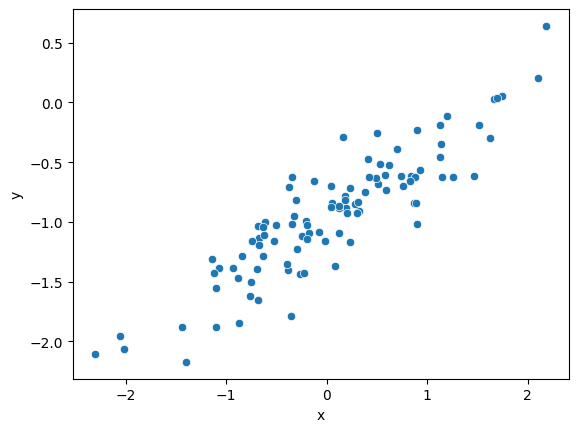

In [15]:
s_plot = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')

print()

analysis = "The plot suggests a linear relationship between x and y with an intercept of roughly -1 and gradient of 0.5"
print(textwrap.fill(analysis, 200))

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [16]:
model_fit = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model_fit.summary())

print()

analysis = "The fitted least squares estimates successfully recover the true parameters. The intercept and gradient are overestimated."
print(textwrap.fill(analysis, 200))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           5.39e-36
Time:                        16:07:16   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appro
priate legend.

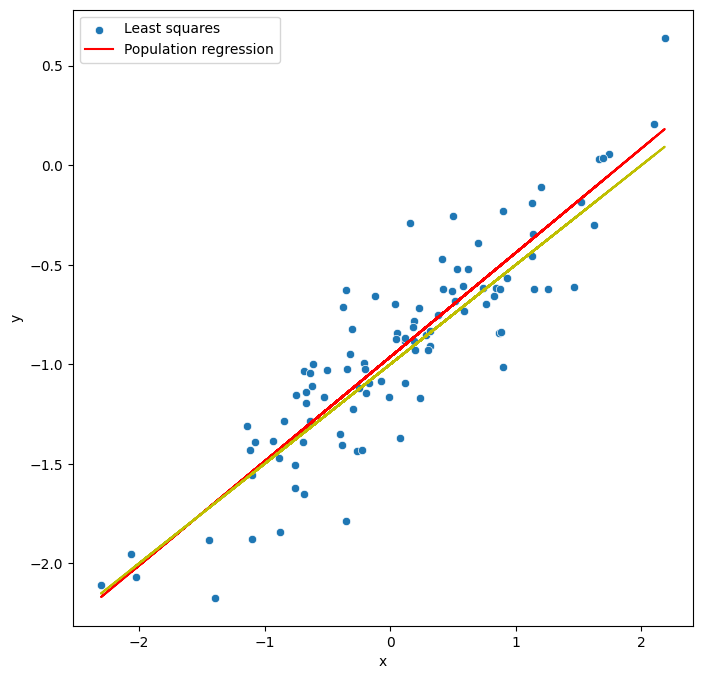

In [17]:
plt.figure(figsize=(8,8))
s_plot = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
s_plot.plot(x, model_fit.predict(), color='r')
s_plot.plot(x, -1+(0.5*x), color='y')
s_plot.legend(['Least squares', 'Population regression']);

 (g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.32e-34
Time:                        16:07:23   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9663      0.029    -33.486   

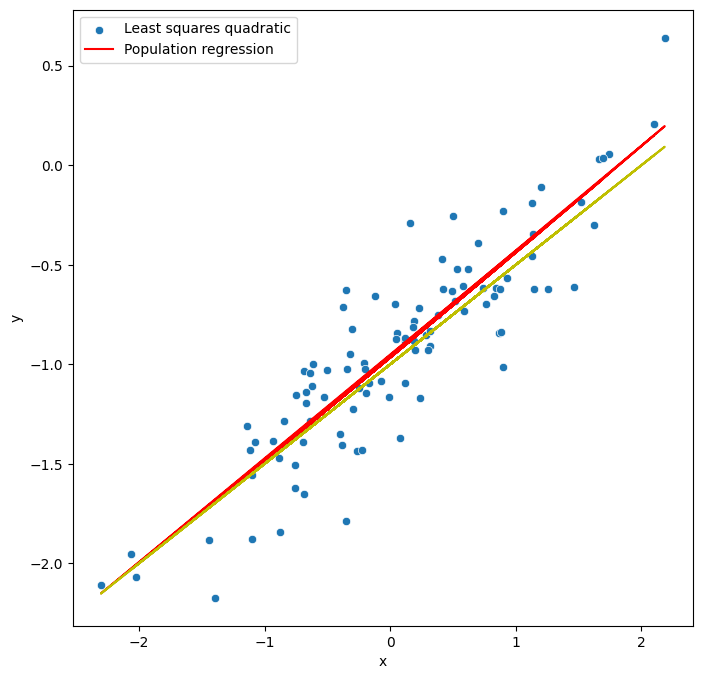

In [18]:
f = 'y ~ x + np.square(x)'
poly_model = smf.ols(formula=f, data=pd.DataFrame({'x':x, 'y':y})).fit()
print(poly_model.summary())

plt.figure(figsize=(8,8))
s_plot = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
s_plot.plot(x, poly_model.predict(), color='r')
s_plot.plot(x, -1+(0.5*x), color='y')
s_plot.legend(['Least squares quadratic', 'Population regression'])

print()

analysis = "The p-value > 0.05 for this variable suggests that it is not statistically significant in representing our data. Overall the quadratic term does not seem to have improved our model."
print(textwrap.fill(analysis, 200))


 (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term in (b). Describe your results.

Length of y = 10.617729160380613
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9084.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.97e-98
Time:                        16:07:30   Log-Likelihood:                 165.13
No. Observations:                 100   AIC:                            -326.3
Df Residuals:                      98   BIC:                            -321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.99

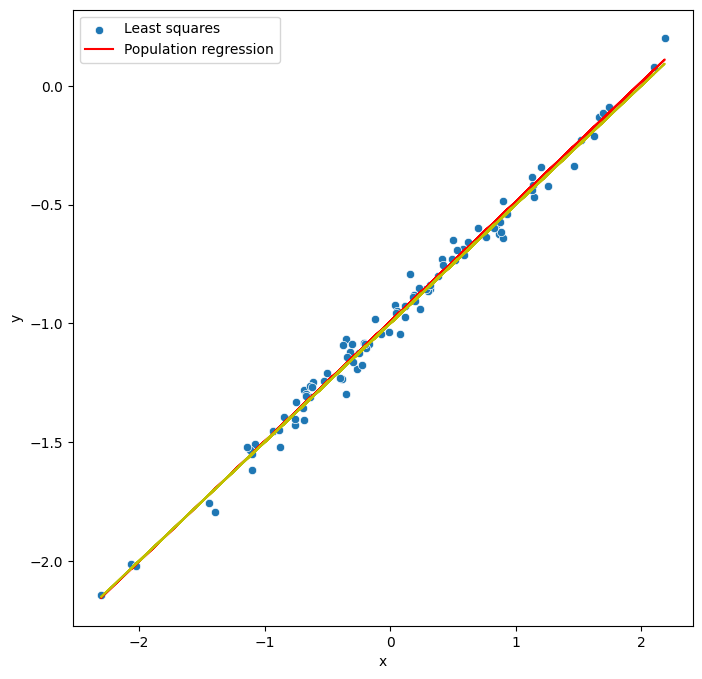

In [19]:
np.random.seed(1)

mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

mu, sigma = 0, 0.05
epsilon = np.random.normal(mu, sigma, 100)

y = -1 + 0.5*x + epsilon
print('Length of y = ' + str(np.sqrt(np.inner(y, y))))

model_fit = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model_fit.summary())

plt.figure(figsize=(8,8))
s_plot = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
s_plot.plot(x, model_fit.predict(), color='r')
s_plot.plot(x, -1+(0.5*x), color='y')
s_plot.legend(['Least squares', 'Population regression'])

print()

analysis = "A dataset with reduced variance/sigma reduced error rate in our model. The value of R-squared has increased from 0.8 to 0.989."
print(textwrap.fill(analysis, 200))

 (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term in (b). Describe your results.

Length of y = 11.173260452749581
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           2.20e-17
Time:                        16:07:35   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.92

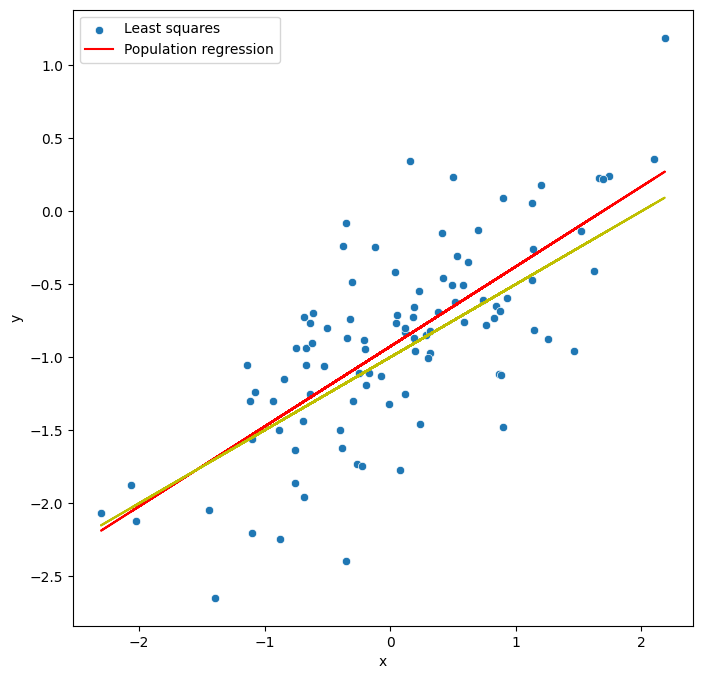

In [20]:
np.random.seed(1)

mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

mu, sigma = 0, 0.5
epsilon = np.random.normal(mu, sigma, 100)

y = -1 + 0.5*x + epsilon
print('Length of y = ' + str(np.sqrt(np.inner(y, y))))

model_fit = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model_fit.summary())

plt.figure(figsize=(8,8))
s_plot = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
s_plot.plot(x, model_fit.predict(), color='r')
s_plot.plot(x, -1+(0.5*x), color='y')
s_plot.legend(['Least squares', 'Population regression'])

print()

analysis = "Increasing the variance/sigma has increased the error rate in our model. This is reflected by a reduction in R-squared."
print(textwrap.fill(analysis, 200))

 (j) What are the confidence intervals for 0 and 1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [23]:
np.random.seed(1)

beta_0 = -1
beta_1 = 0.5
mu, sigma = 0, 1

x = np.random.normal(mu, sigma, 100)

eps_original = np.random.normal(0, 1, 100)
y_original = beta_0 + beta_1 * x + eps_original

eps_more_noisy = np.random.normal(0, 2, 100)
y_noisy = beta_0 + beta_1 * x + eps_more_noisy

eps_less_noisy = np.random.normal(0, 0.25, 100)
y_less_noisy = beta_0 + beta_1 * x + eps_less_noisy

X_with_const = sm.add_constant(x)

model_original = sm.OLS(y_original, X_with_const).fit()
model_noisy = sm.OLS(y_noisy, X_with_const).fit()
model_less_noisy = sm.OLS(y_less_noisy, X_with_const).fit()

ci_original = model_original.conf_int(alpha=0.05)
ci_more_noisy = model_noisy.conf_int(alpha=0.05)
ci_less_noisy = model_less_noisy.conf_int(alpha=0.05)

print("95% CONFIDENCE INTERVALS")

print("\nOriginal (σ=1):")
print(ci_original)

print("\nMore Nosiy (σ=2):")
print(ci_more_noisy)

print("\nLess Noisy (σ=0.25):")
print(ci_less_noisy)

print()

analysis = "Less noisy data gives much MORE PRECISE estimates (narrow CIs). Noisier data gives much LESS PRECISE estimates (wide CIs)"
print(textwrap.fill(analysis, 200))


95% CONFIDENCE INTERVALS

Original (σ=1):
[[-1.03948193 -0.66649101]
 [ 0.38522675  0.80562751]]

More Nosiy (σ=2):
[[-1.37896184 -0.57180077]
 [-0.03699592  0.87276116]]

Less Noisy (σ=0.25):
[[-1.05675182 -0.95022903]
 [ 0.41355548  0.53361808]]

Less noisy data gives much MORE PRECISE estimates (narrow CIs). Noisier data gives much LESS PRECISE estimates (wide CIs)


___Chapter 4: Problem 13___

This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089
 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

 (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [30]:
weekly_df = pd.read_csv('Weekly.csv')
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


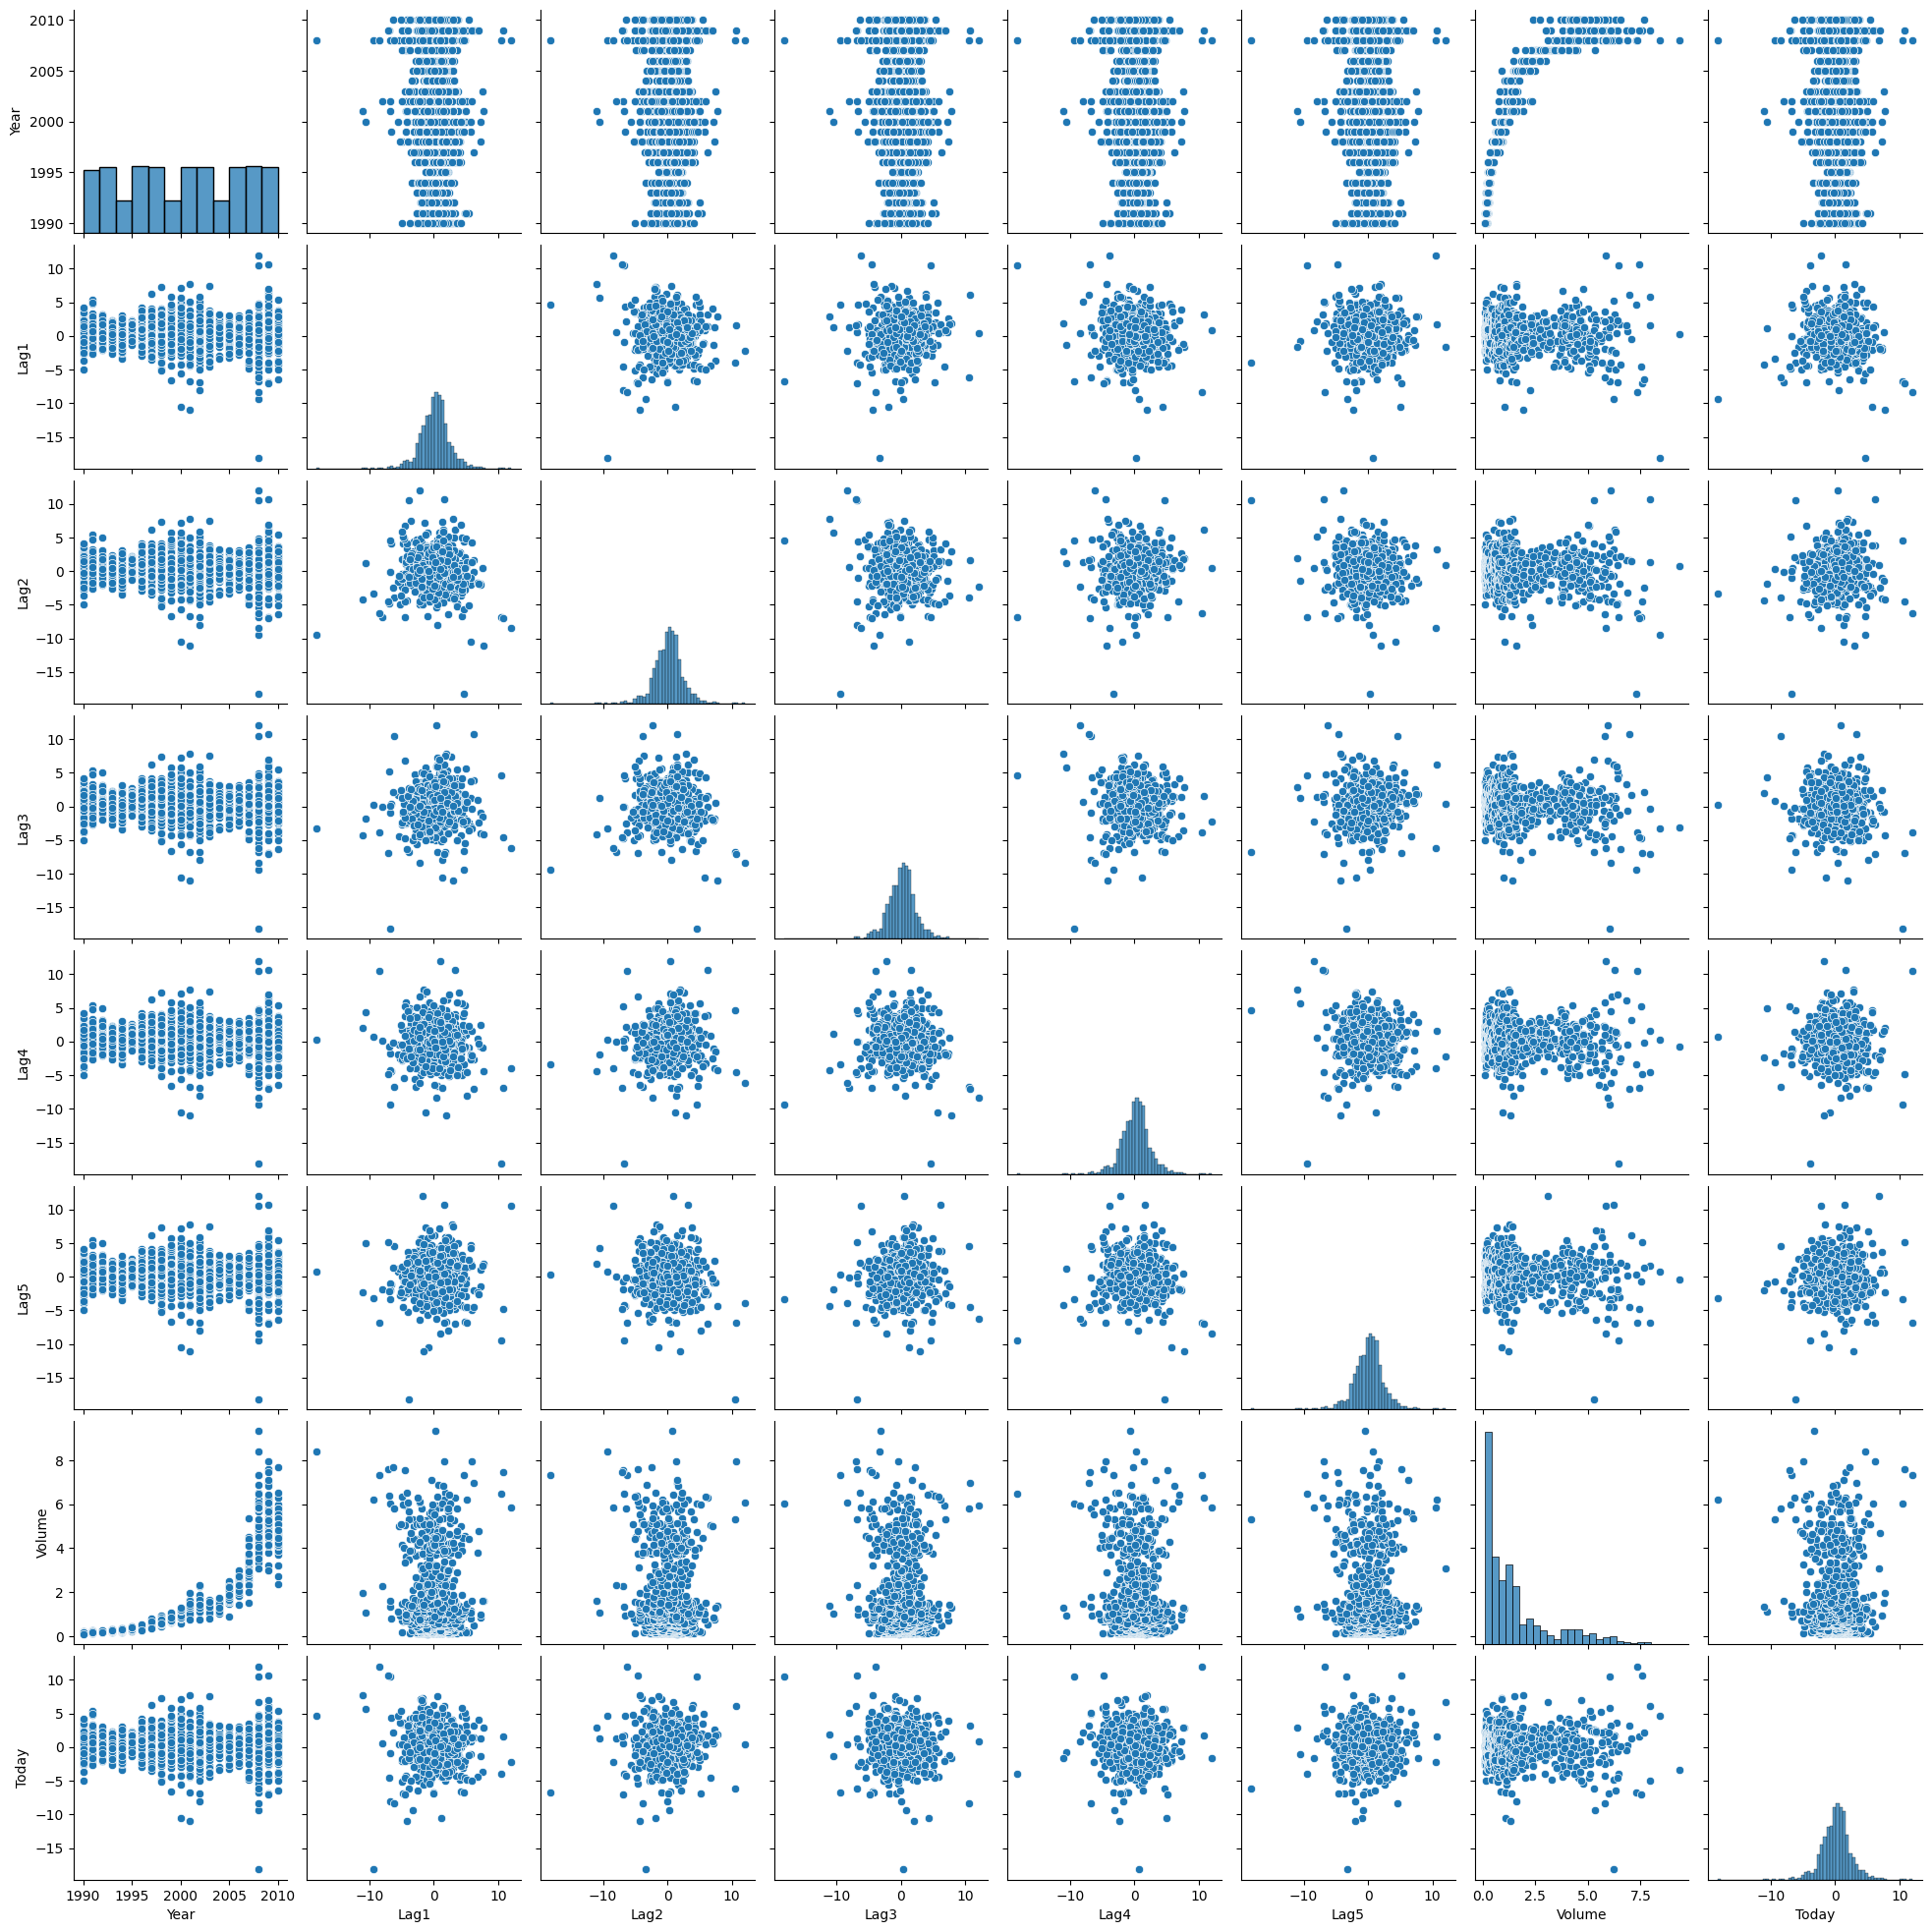

In [31]:
sns.pairplot(weekly_df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'Lag1'),
  Text(0, 2.5, 'Lag2'),
  Text(0, 3.5, 'Lag3'),
  Text(0, 4.5, 'Lag4'),
  Text(0, 5.5, 'Lag5'),
  Text(0, 6.5, 'Volume'),
  Text(0, 7.5, 'Today'),
  Text(0, 8.5, 'Direction_Up')])

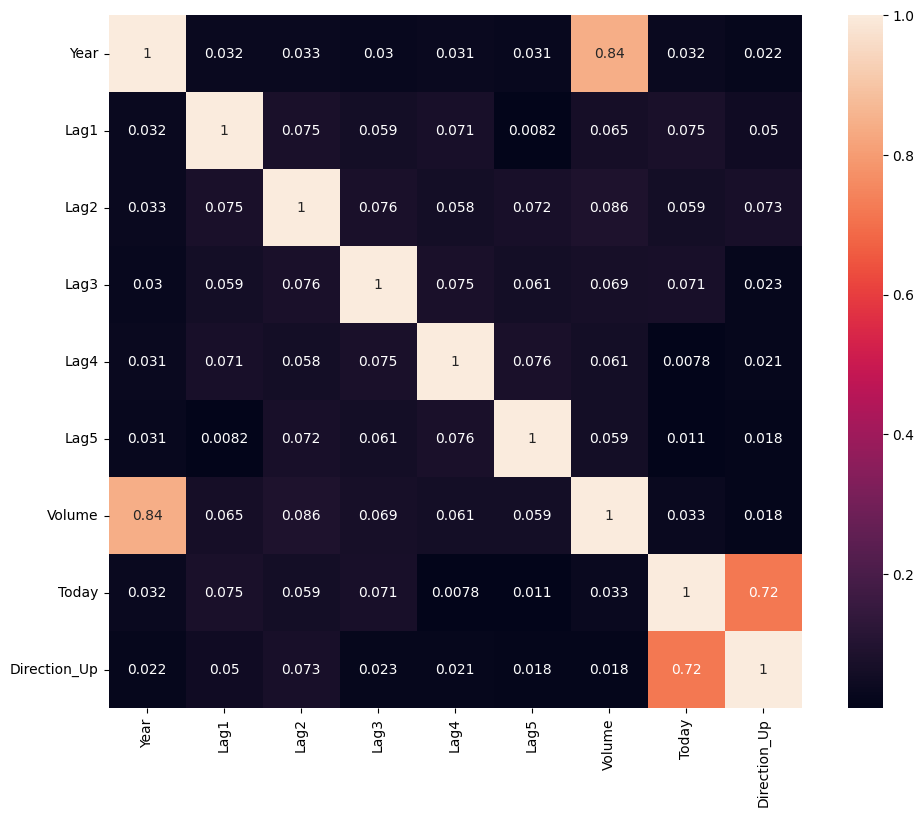

In [26]:
# Pre-processing
assert weekly_df.isnull().sum().sum() == 0
weekly_df = pd.get_dummies(weekly_df).drop('Direction_Down', axis=1)

corr_matrix = weekly_df.corr().abs()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [32]:
analysis = "2 pairs of features are correlated: Year –> Volume + Today –> Direction UP"
print(textwrap.fill(analysis, 200))
analysis = "Looking at the pairplot -- Volume increases greatly with Year" 
print(textwrap.fill(analysis, 200))

2 pairs of features are correlated: Year –> Volume + Today –> Direction UP
Looking at the pairplot -- Volume increases greatly with Year


 (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [33]:
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

weekly_df['Direction_binary'] = (weekly_df['Direction'] == 'Up').astype(int)
formula = 'Direction_binary ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

logit_model = smf.logit(formula=formula, data=weekly_df).fit()
print(logit_model.summary())

# Do any of the predictors appear to be statistically significant?
display('Statistically significant predictors')
display(pd.DataFrame({'p>|z|': logit_model.pvalues[logit_model.pvalues < 0.05].drop('Intercept')}))

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                0.006580
Time:                        16:11:15   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

'Statistically significant predictors'

,p>|z|
Lag2,0.029601


(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [39]:
pred_probs = logit_model.predict()
pred_class = (pred_probs > 0.5).astype(int)

actual = weekly_df['Direction_binary']

conf_matrix = confusion_matrix(actual, pred_class)

print("\n                Predicted")
print("                Down (0)    Up (1)")
print(f"Actual Down (0)    {conf_matrix[0,0]:<8}    {conf_matrix[0,1]:<8}")
print(f"Actual Up (1)      {conf_matrix[1,0]:<8}    {conf_matrix[1,1]:<8}")

TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

total = TN + FP + FN + TP
accuracy = (TP + TN) / total
error_rate = (FP + FN) / total

print()

print(f"Total Observations:              {total}")
print(f"Correct Predictions (TP + TN):   {TP + TN}")
print(f"Incorrect Predictions (FP + FN): {FP + FN}")
print(f"Overall Accuracy:                {accuracy*100:.2f}%")

print()

if FP + FN > 0:
    fp_percent = FP / (FP + FN) * 100
    fn_percent = FN / (FP + FN) * 100
    
    print(f"\nFalse Positives:")
    print(f"The model predicted 'Up' but the market actually went 'Down'")
    print(f"These are {FP} weeks where the model was overly optimistic")
    
    print(f"\nFalse Negatives:")
    print(f"The model predicted 'Down' but the market actually went 'Up'")
    print(f"These are {FN} weeks where the model missed upward movements")


                Predicted
                Down (0)    Up (1)
Actual Down (0)    54          430     
Actual Up (1)      48          557     

Total Observations:              1089
Correct Predictions (TP + TN):   611
Incorrect Predictions (FP + FN): 478
Overall Accuracy:                56.11%


False Positives:
The model predicted 'Up' but the market actually went 'Down'
These are 430 weeks where the model was overly optimistic

False Negatives:
The model predicted 'Down' but the market actually went 'Up'
These are 48 weeks where the model missed upward movements


(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [ ]:
train_df = weekly_df[weekly_df['Year'] <= 2008]
test_df = weekly_df[weekly_df['Year'] >= 2009]

# Fit logistic regression
formula = 'Direction_binary ~ Lag2'
logit_model = smf.logit(formula=formula, data=train_df).fit()
print(logit_model.summary())

# Make predictions on test set
test_pred_probs = logit_model.predict(test_df)
test_pred_class = (test_pred_probs > 0.5).astype(int)

test_actual = test_df['Direction_binary']

# Compute confusion matrix
cm = confusion_matrix(test_actual, test_pred_class)

print()

print("CONFUSION MATRIX (Test Set: 2009-2010)")
print("\n                Predicted")
print("                Down (0)    Up (1)")
print(f"Actual Down (0)    {cm[0,0]:<8}    {cm[0,1]:<8}")
print(f"Actual Up (1)      {cm[1,0]:<8}    {cm[1,1]:<8}")

TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives
TP = cm[1, 1]  # True Positives

total = TN + FP + FN + TP
correct = TP + TN
incorrect = FP + FN
accuracy = correct / total
error_rate = incorrect / total

print()

print(f"Total Test Observations:         {total}")
print(f"Correct Predictions (TP + TN):   {correct}")
print(f"Incorrect Predictions (FP + FN): {incorrect}")
print(f"\nOverall Fraction Correct:      {accuracy*100:.2f}%")

(e) Repeat (d) using LDA.

In [ ]:
train_df = weekly_df[weekly_df['Year'] <= 2008]
test_df = weekly_df[weekly_df['Year'] >= 2009]

# Prepare data
X_train = train_df[['Lag2']].values
y_train = train_df['Direction_binary'].values

X_test = test_df[['Lag2']].values
y_test = test_df['Direction_binary'].values

# Fit model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

print(f"Prior probabilities:")
print(f"  Down (0): {lda_model.priors_[0]:.4f}")
print(f"  Up (1):   {lda_model.priors_[1]:.4f}")
print(f"\nGroup means:")
print(f"  Down (0): {lda_model.means_[0][0]:.4f}")
print(f"  Up (1):   {lda_model.means_[1][0]:.4f}")

# Make predictions on test set
test_pred_class = lda_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred_class)

print()

print("CONFUSION MATRIX (Test Set: 2009-2010)")
print("\n                Predicted")
print("                Down (0)    Up (1)")
print(f"Actual Down (0)    {cm[0,0]:<8}    {cm[0,1]:<8}")
print(f"Actual Up (1)      {cm[1,0]:<8}    {cm[1,1]:<8}")

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

total = TN + FP + FN + TP
correct = TP + TN
incorrect = FP + FN
accuracy = correct / total

print()

print("PERFORMANCE (LDA)")
print(f"Total Test Observations:         {total}")
print(f"Correct Predictions (TP + TN):   {correct}")
print(f"Incorrect Predictions (FP + FN): {incorrect}")
print(f"\nOverall Fraction Correct:      {accuracy*100:.2f}%")

(f) Repeat (d) using QDA.

In [ ]:
train_df = weekly_df[weekly_df['Year'] <= 2008]
test_df = weekly_df[weekly_df['Year'] >= 2009]

# Prepare data
X_train = train_df[['Lag2']].values
y_train = train_df['Direction_binary'].values

X_test = test_df[['Lag2']].values
y_test = test_df['Direction_binary'].values

# Fit model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

print("QDA MODEL DETAILS")
print(f"Prior probabilities:")
print(f"  Down (0): {qda_model.priors_[0]:.4f}")
print(f"  Up (1):   {qda_model.priors_[1]:.4f}")
print(f"\nGroup means:")
print(f"  Down (0): {qda_model.means_[0][0]:.4f}")
print(f"  Up (1):   {qda_model.means_[1][0]:.4f}")

# Make predictions on test set
test_pred_class = qda_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred_class)

print("CONFUSION MATRIX (Test Set: 2009-2010)")
print("\n                Predicted")
print("                Down (0)    Up (1)")
print(f"Actual Down (0)    {cm[0,0]:<8}    {cm[0,1]:<8}")
print(f"Actual Up (1)      {cm[1,0]:<8}    {cm[1,1]:<8}")

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

total = TN + FP + FN + TP
correct = TP + TN
incorrect = FP + FN
accuracy = correct / total

print()

print("PERFORMANCE (QDA)")
print(f"Total Test Observations:         {total}")
print(f"Correct Predictions (TP + TN):   {correct}")
print(f"Incorrect Predictions (FP + FN): {incorrect}")
print(f"\nOverall Fraction Correct:      {accuracy*100:.2f}%")

(g) Repeat (d) using KNN with K=1.

In [ ]:
train_df = weekly_df[weekly_df['Year'] <= 2008]
test_df = weekly_df[weekly_df['Year'] >= 2009]

# Prepare data
X_train = train_df[['Lag2']].values
y_train = train_df['Direction_binary'].values

X_test = test_df[['Lag2']].values
y_test = test_df['Direction_binary'].values

# Fit model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

print("KNN MODEL DETAILS")
print(f"Number of neighbors (K): 1")
print(f"Training samples: {len(X_train)}")

# Make predictions on test set
test_pred_class = knn_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred_class)

print("CONFUSION MATRIX (Test Set: 2009-2010)")
print("\n                Predicted")
print("                Down (0)    Up (1)")
print(f"Actual Down (0)    {cm[0,0]:<8}    {cm[0,1]:<8}")
print(f"Actual Up (1)      {cm[1,0]:<8}    {cm[1,1]:<8}")

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

total = TN + FP + FN + TP
correct = TP + TN
incorrect = FP + FN
accuracy = correct / total

print()

print("PERFORMANCE")

print(f"Total Test Observations:         {total}")
print(f"Correct Predictions (TP + TN):   {correct}")
print(f"Incorrect Predictions (FP + FN): {incorrect}")
print(f"\nOverall Fraction Correct:      {accuracy*100:.2f}%")

(h) Repeat (d) using naive Bayes.

In [40]:
train_df = weekly_df[weekly_df['Year'] <= 2008]
test_df = weekly_df[weekly_df['Year'] >= 2009]

# Prepare data
X_train = train_df[['Lag2']].values
y_train = train_df['Direction_binary'].values

X_test = test_df[['Lag2']].values
y_test = test_df['Direction_binary'].values

# Fit model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("NAIVE BAYES MODEL DETAILS")
print(f"Class priors:")
print(f"  Down (0): {nb_model.class_prior_[0]:.4f}")
print(f"  Up (1):   {nb_model.class_prior_[1]:.4f}")
print(f"\nClass means (Lag2):")
print(f"  Down (0): {nb_model.theta_[0][0]:.4f}")
print(f"  Up (1):   {nb_model.theta_[1][0]:.4f}")
print(f"\nClass variances (Lag2):")
print(f"  Down (0): {nb_model.var_[0][0]:.4f}")
print(f"  Up (1):   {nb_model.var_[1][0]:.4f}")

# Make predictions on test set
test_pred_class = nb_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred_class)

print("CONFUSION MATRIX (Test Set: 2009-2010)")
print("\n                Predicted")
print("                Down (0)    Up (1)")
print(f"Actual Down (0)    {cm[0,0]:<8}    {cm[0,1]:<8}")
print(f"Actual Up (1)      {cm[1,0]:<8}    {cm[1,1]:<8}")

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

total = TN + FP + FN + TP
correct = TP + TN
incorrect = FP + FN
accuracy = correct / total

print()
print("PERFORMANCE (NAIVE BAYES)")

print(f"Total Test Observations:         {total}")
print(f"Correct Predictions (TP + TN):   {correct}")
print(f"Incorrect Predictions (FP + FN): {incorrect}")
print(f"\nOverall Fraction Correct:      {accuracy*100:.2f}%")

NAIVE BAYES MODEL DETAILS
Class priors:
  Down (0): 0.4477
  Up (1):   0.5523

Class means (Lag2):
  Down (0): -0.0357
  Up (1):   0.2604

Class variances (Lag2):
  Down (0): 4.8268
  Up (1):   5.3609
CONFUSION MATRIX (Test Set: 2009-2010)

                Predicted
                Down (0)    Up (1)
Actual Down (0)    0           43      
Actual Up (1)      0           61      

PERFORMANCE (NAIVE BAYES)
Total Test Observations:         104
Correct Predictions (TP + TN):   61
Incorrect Predictions (FP + FN): 43

Overall Fraction Correct:      58.65%


 (i) Which of these methods appears to provide the best results on this data?

Method               Accuracy    
Logistic Regression  62.50       
LDA                  62.50       
QDA                  58.65       
KNN (K=1)            50.96       
Naive Bayes          58.65       


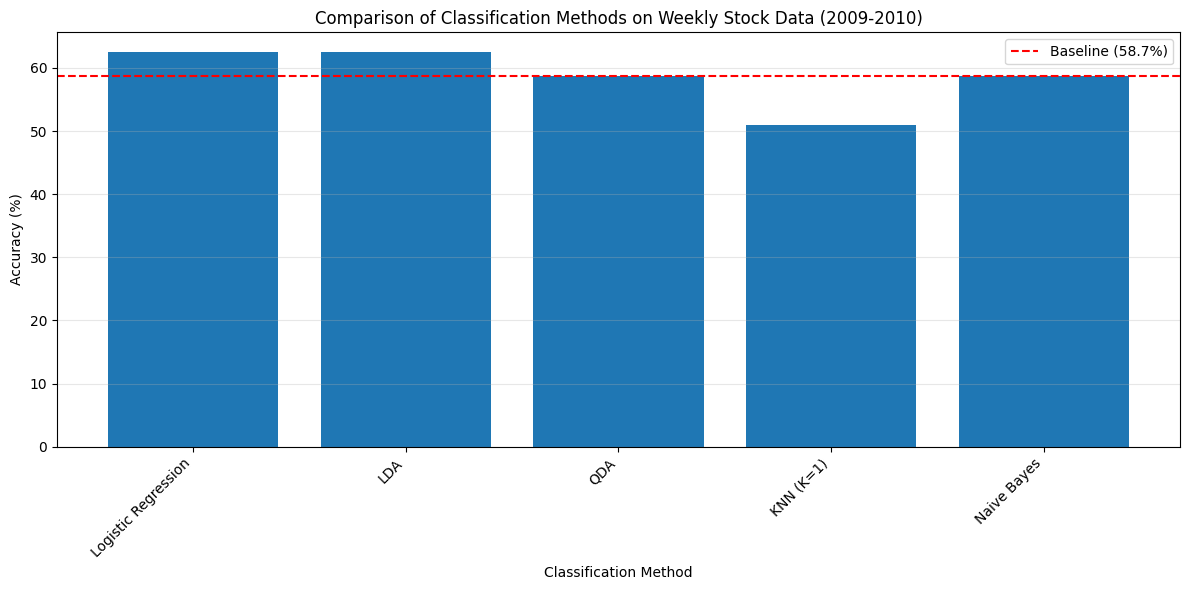

Logistic regression and LDA provide the best results in terms of oeverall error rate.


In [41]:
# Create training and test sets
train_df = weekly_df[weekly_df['Year'] <= 2008]
test_df = weekly_df[weekly_df['Year'] >= 2009]

# Prepare data
X_train = train_df[['Lag2']].values
y_train = train_df['Direction_binary'].values
X_test = test_df[['Lag2']].values
y_test = test_df['Direction_binary'].values

# Dictionary to store results
results = {}

# 1. Logistic Regression
formula = 'Direction_binary ~ Lag2'
logit_model = smf.logit(formula=formula, data=train_df).fit(disp=0)
pred_logit = (logit_model.predict(test_df) > 0.5).astype(int)
cm_logit = confusion_matrix(test_df['Direction_binary'], pred_logit)
results['Logistic Regression'] = {
    'cm': cm_logit,
    'accuracy': (cm_logit[0,0] + cm_logit[1,1]) / cm_logit.sum()
}

# 2. LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
pred_lda = lda_model.predict(X_test)
cm_lda = confusion_matrix(y_test, pred_lda)
results['LDA'] = {
    'cm': cm_lda,
    'accuracy': (cm_lda[0,0] + cm_lda[1,1]) / cm_lda.sum()
}

# 3. QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
pred_qda = qda_model.predict(X_test)
cm_qda = confusion_matrix(y_test, pred_qda)
results['QDA'] = {
    'cm': cm_qda,
    'accuracy': (cm_qda[0,0] + cm_qda[1,1]) / cm_qda.sum()
}

# 4. KNN (K=1)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, pred_knn)
results['KNN (K=1)'] = {
    'cm': cm_knn,
    'accuracy': (cm_knn[0,0] + cm_knn[1,1]) / cm_knn.sum()
}

# 5. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, pred_nb)
results['Naive Bayes'] = {
    'cm': cm_nb,
    'accuracy': (cm_nb[0,0] + cm_nb[1,1]) / cm_nb.sum()
}

print(f"{'Method':<20} {'Accuracy':<12}")
for method, metrics in results.items():
    print(f"{method:<20} {metrics['accuracy']*100:<12.2f}")

# Visualization
plt.figure(figsize=(12, 6))
methods = list(results.keys())
accuracies = [results[m]['accuracy']*100 for m in methods]
baseline_accuracy = max(sum(y_test == 1), sum(y_test == 0)) / len(y_test)

plt.bar(methods, accuracies)
plt.axhline(y=baseline_accuracy*100, color='red', linestyle='--', label=f'Baseline ({baseline_accuracy*100:.1f}%)')
plt.xlabel('Classification Method')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Classification Methods on Weekly Stock Data (2009-2010)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Logistic regression and LDA provide the best results in terms of oeverall error rate.")

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [42]:
# Prepare data
weekly_df['Direction_Up'] = (weekly_df['Direction'] == 'Up').astype(int)

train_idx = weekly_df.index[weekly_df['Year'] < 2009]
weekly_df_train = weekly_df.iloc[train_idx]
weekly_df_test = weekly_df.drop(train_idx)

# Define predictors
predictor_sets = {
    'Lag2_only': ['Lag2'],
    'Lag1_Lag2': ['Lag1', 'Lag2'],
    'All_Lags': ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5'],
    'Lags_Volume': ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'],
    'All_Features': ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Year']
}

print("TESTING MULTIPLE PREDICTOR COMBINATIONS")

best_accuracy = 0
best_config = {}

for pred_name, predictors in predictor_sets.items():
    print(f"PREDICTOR SET: {pred_name}")
    print(f"Features: {', '.join(predictors)}")
    
    # Prepare train/test data
    X_train = np.array(weekly_df_train[predictors])
    X_test = np.array(weekly_df_test[predictors])
    y_train = np.array(weekly_df_train['Direction_Up'])
    y_test = np.array(weekly_df_test['Direction_Up'])
    
    # MODELS
    models = {
        'Logistic': LogisticRegression(max_iter=1000).fit(X_train, y_train),
        'LDA': LinearDiscriminantAnalysis().fit(X_train, y_train),
        'QDA': QuadraticDiscriminantAnalysis().fit(X_train, y_train),
        'Naive Bayes': GaussianNB().fit(X_train, y_train),
        'KNN (K=1)': KNeighborsClassifier(n_neighbors=1).fit(preprocessing.scale(X_train), y_train),
        'KNN (K=3)': KNeighborsClassifier(n_neighbors=3).fit(preprocessing.scale(X_train), y_train),
        'KNN (K=5)': KNeighborsClassifier(n_neighbors=5).fit(preprocessing.scale(X_train), y_train),
        'KNN (K=10)': KNeighborsClassifier(n_neighbors=10).fit(preprocessing.scale(X_train), y_train),
    }
    
    scaled_models = ['KNN (K=1)', 'KNN (K=3)', 'KNN (K=5)', 'KNN (K=10)']
    
    # PREDICT AND EVALUATE
    for model_name, model in models.items():
        # Predict
        if model_name in scaled_models:
            y_pred = model.predict(preprocessing.scale(X_test))
        else:
            y_pred = model.predict(X_test)
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
        
        # Track best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_config = {
                'model': model_name,
                'predictors': pred_name,
                'predictor_list': predictors,
                'cm': cm,
                'accuracy': accuracy
            }
        
        # Print results
        print(f"\n{model_name}:")
        print(f"  Accuracy: {accuracy*100:.2f}%")
        print(f"  Confusion Matrix:")
        print(f"                  Predicted Down    Predicted Up")
        print(f"  Actual Down          {cm[0,0]:<14}    {cm[0,1]:<14}")
        print(f"  Actual Up            {cm[1,0]:<14}    {cm[1,1]:<14}")

# Print best overall model
print()

print("BEST RESULTS")
print(f"Model:      {best_config['model']}")
print(f"Predictors: {best_config['predictors']} ({', '.join(best_config['predictor_list'])})")
print(f"Accuracy:   {best_config['accuracy']*100:.2f}%")

print(f"\nConfusion Matrix:")
cm = best_config['cm']
print(f"                  Predicted Down    Predicted Up")
print(f"  Actual Down          {cm[0,0]:<14}    {cm[0,1]:<14}")
print(f"  Actual Up            {cm[1,0]:<14}    {cm[1,1]:<14}")

TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0

TESTING MULTIPLE PREDICTOR COMBINATIONS
PREDICTOR SET: Lag2_only
Features: Lag2

Logistic:
  Accuracy: 62.50%
  Confusion Matrix:
                  Predicted Down    Predicted Up
  Actual Down          9                 34            
  Actual Up            5                 56            

LDA:
  Accuracy: 62.50%
  Confusion Matrix:
                  Predicted Down    Predicted Up
  Actual Down          9                 34            
  Actual Up            5                 56            

QDA:
  Accuracy: 58.65%
  Confusion Matrix:
                  Predicted Down    Predicted Up
  Actual Down          0                 43            
  Actual Up            0                 61            

Naive Bayes:
  Accuracy: 58.65%
  Confusion Matrix:
                  Predicted Down    Predicted Up
  Actual Down          0                 43            
  Actual Up            0                 61            

KNN (K=1):
  Accuracy: 50.96%
  Confusion Matrix:
                  Predicted Down